<a href="https://colab.research.google.com/github/KuhleDawn/Cafe-App/blob/main/CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Install Dependencies and Setup**




In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

**2. Remove dodgy images**

In [7]:
import cv2
import imghdr


In [10]:
data_dir = 'data'

In [11]:
os.listdir(data_dir)

['Washers', 'Shafts', 'Rod Ends', 'Clutches']

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

**3. Load Data**

In [15]:
import numpy as np
from matplotlib import pyplot as plt


In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 718 files belonging to 4 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

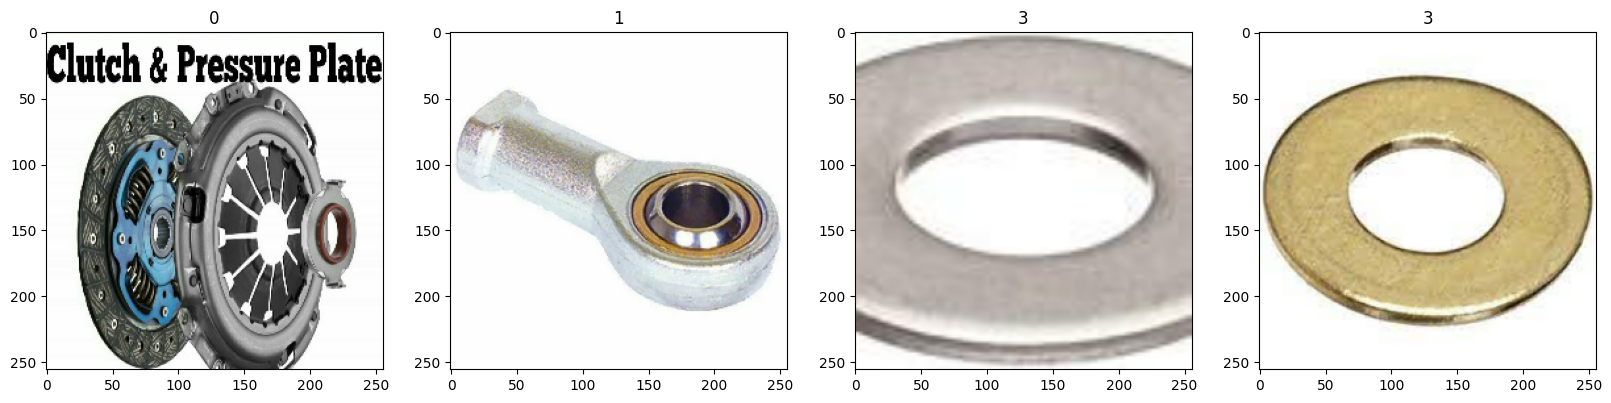

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

**4. Scale Data**

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

**5. Split Dataset**

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size


16

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**6. Build Deep Learning Model**

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**7. Train**

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 47s 3s/step - loss: -144.6746 - accuracy: 0.2617 - val_loss: -836.0104 - val_accuracy: 0.3125
Epoch 2/20
16/16 [==============================] - 51s 3s/step - loss: -3849.5239 - accuracy: 0.2617 - val_loss: -13607.9873 - val_accuracy: 0.2422
Epoch 3/20
16/16 [==============================] - 59s 4s/step - loss: -55214.3203 - accuracy: 0.2578 - val_loss: -134338.3750 - val_accuracy: 0.2969
Epoch 4/20
16/16 [==============================] - 49s 3s/step - loss: -335465.2500 - accuracy: 0.2441 - val_loss: -848578.4375 - val_accuracy: 0.1875
Epoch 5/20
16/16 [==============================] - 46s 3s/step - loss: -1758045.0000 - accuracy: 0.2559 - val_loss: -3531687.7500 - val_accuracy: 0.2266
Epoch 6/20
16/16 [==============================] - 47s 3s/step - loss: -5876628.0000 - accuracy: 0.2461 - val_loss: -10495000.0000 - val_accuracy: 0.2656
Epoch 7/20
16/16 [==============================] - 50s 3s/step - loss: -18759546.0000 - accu

**8. Plot Performance**

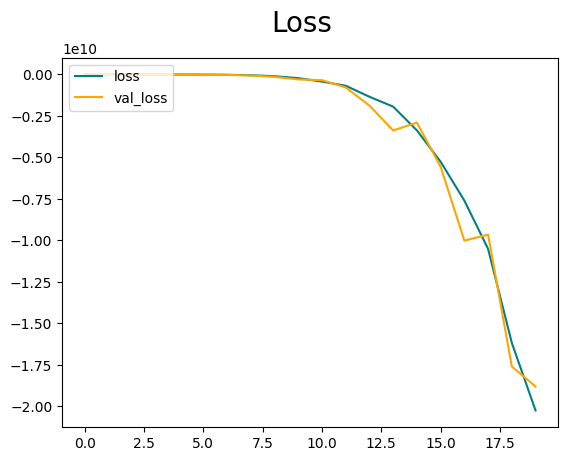

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

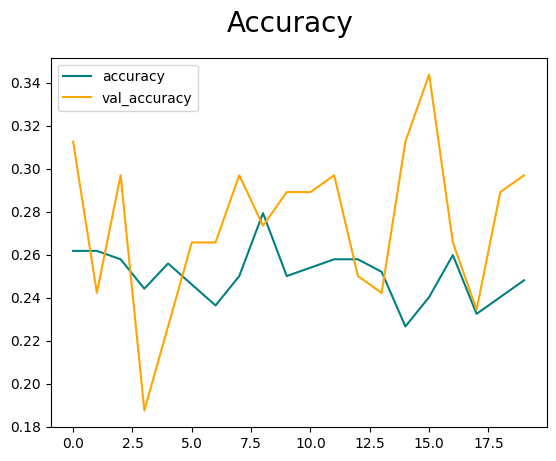

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**9. Evaluate**

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [39]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.671875, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.265625, shape=(), dtype=float32)


**10. Test**

In [48]:
import cv2
import matplotlib.pyplot as plt

In [58]:
image = np.array([1, 2, 3, 4])
image_float = image.astype('float32')

print(image_float)


img = cv2.imread('154006829.jpg')


plt.show()

[1. 2. 3. 4.]


In [59]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: ignored

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')